In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
spam = fetch_openml('spambase')

In [3]:
spam['frame']

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3.0,88.0,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4.0,14.0,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6.0,118.0,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5.0,78.0,0


In [4]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [6]:
# sns.pairplot(spam['frame'].iloc(1)[:5])
def nonzero_prop(x):
    return (x!=0).mean()

spam['frame'].drop(columns=['class']).agg(['max', nonzero_prop]).T

,max,nonzero_prop
word_freq_make,4.540,0.228863
word_freq_address,14.280,0.195175
word_freq_all,5.100,0.410346
word_freq_3d,42.810,0.010215
word_freq_our,10.000,0.379917
word_freq_over,5.880,0.217127
word_freq_remove,7.270,0.175397
word_freq_internet,11.110,0.179092
word_freq_order,5.260,0.168007
word_freq_mail,18.180,0.282982


In [7]:
train_df,test_df = train_test_split(spam['frame'], test_size=0.2, shuffle=True, random_state=1)

def Xyspam(df):
    return df.drop(columns=['class']), df['class']


def print_report(model, X, y):
    y_pred = model.predict(X)
    cm = pd.DataFrame(confusion_matrix(y_pred=y_pred, y_true=y, labels=model.classes_), 
                      columns=model.classes_, index=model.classes_)
    cm.index.name = 'True'
    cm.columns.name = 'Predicted'
    cr = classification_report(y_pred=y_pred, y_true=y)
    print(cm)
    print(cr)
    return (cm, cr)

def plot_decision(model, X, y, r=(-np.inf, np.inf)):
    delta = model.decision_function(X)
    r = (max(r[0],delta.min()), min(r[1],delta.max()))
    n =len(model.classes_)
    for i, c in enumerate(model.classes_):
        idx = y==c
        plt.subplot(n,1,i+1)
        sns.histplot(x = delta[idx])
        plt.xlim(*r)
    plt.show()


In [10]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [26]:
logistic = make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l2',
                                            solver='newton-cg',
                                            C=1000
                                            #max_iter=1000,
                                            #tol=1e-3
                                           ))

logistic.fit(*Xyspam(train_df))

cm, cr = print_report(logistic, *Xyspam(test_df))

Predicted    0    1
True               
0          541   23
1           40  317
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       564
           1       0.93      0.89      0.91       357

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921



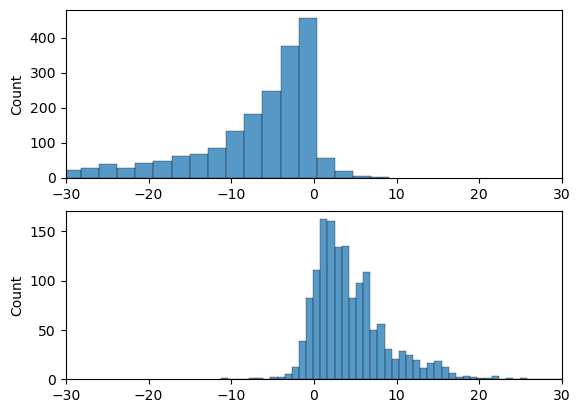

In [27]:
plot_decision(logistic, *Xyspam(train_df), r=(-30,30))

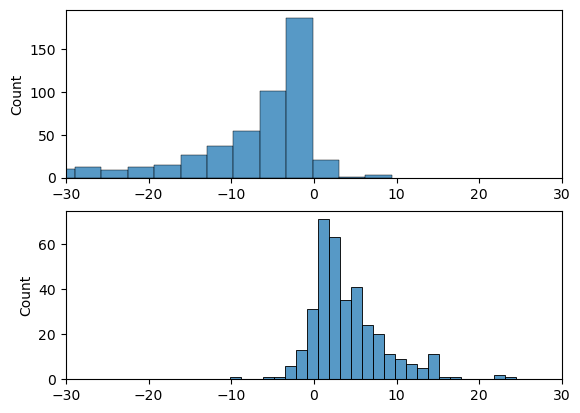

In [28]:
plot_decision(logistic, *Xyspam(test_df), r=(-30,30))

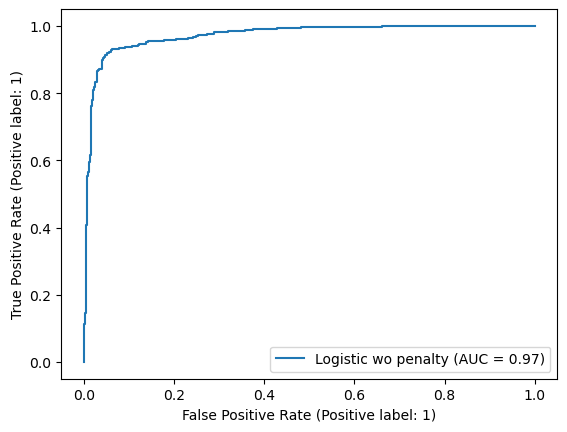

In [29]:
RocCurveDisplay.from_estimator(logistic, *Xyspam(test_df), name='Logistic wo penalty')

In [30]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=16, shuffle=True)


In [31]:
logistic_l2_cv = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(
        Cs=[0.1, 1, 2.5, 5, 7.5, 10, 15, 20, 50, 100, 1000], 
        # #[0.1,1,5,10,50,100], 
        penalty='l2', 
        cv=cv, 
        solver = 'liblinear',
        refit=True
    )
).fit(*Xyspam(train_df)) 
#spam['frame']))

In [32]:
print(logistic_l2_cv[1].C_)

[10.]


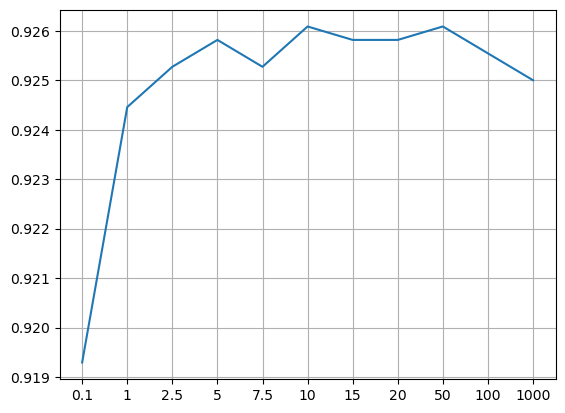

In [33]:
plt.plot(logistic_l2_cv[1].scores_['1'].mean(axis=0)) #.T) #.mean(axis=0))
plt.grid()
plt.xticks(*zip(*enumerate(logistic_l2_cv[1].Cs)))
plt.show()

In [34]:
#logistic = make_pipeline(StandardScaler(),
#                         LogisticRegression(penalty='l2', C=10, solver='newton-cg'))
#logistic.fit(*Xyspam(train_df))

print('logistic regression without penalty')
print(cm)
print('logistic regression with l2 penalty (cv selected)')
cm_l2, cr_l2 = print_report(logistic_l2_cv, *Xyspam(test_df))


logistic regression without penalty
Predicted    0    1
True               
0          541   23
1           40  317
logistic regression with l2 penalty (cv selected)
Predicted    0    1
True               
0          541   23
1           39  318
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       564
           1       0.93      0.89      0.91       357

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921



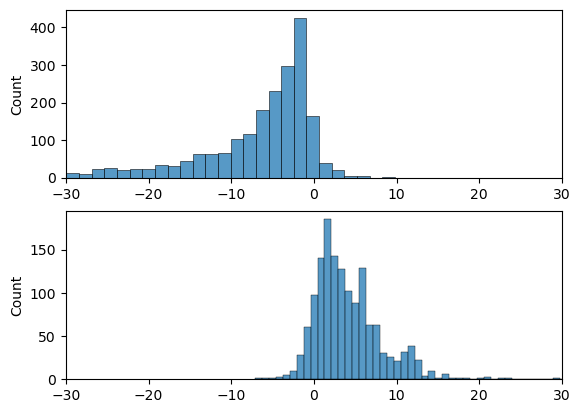

In [35]:
plot_decision(logistic_l2_cv, *Xyspam(train_df), r=(-30,30))

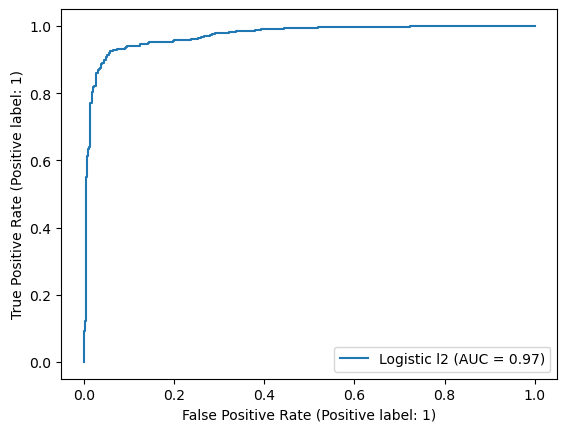

In [37]:
RocCurveDisplay.from_estimator(logistic_l2_cv, *Xyspam(test_df), name='Logistic l2')

In [38]:
logistic_l1_cv = make_pipeline(
    StandardScaler(), 
    LogisticRegressionCV(
        Cs=[0.1, 1, 2.5, 5, 7.5, 10, 15, 20, 50, 100, 1000], # #[0.1,1,5,10,50,100], 
        penalty='l1', 
        cv=cv, 
        solver = 'liblinear',
        refit=True
    )
).fit(*Xyspam(train_df)) #spam['frame']))

l1_best_C=logistic_l1_cv[1].C_
print(l1_best_C)

[5.]


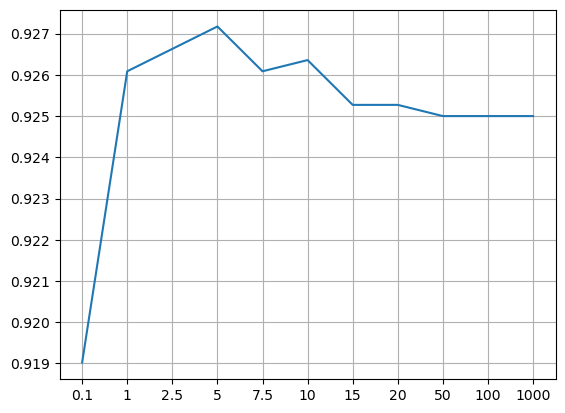

number of zero coefficients
C           0.1     1.0     2.5     5.0     7.5     10.0    15.0    20.0    \
Fold index                                                                   
0                7       3       1       0       0       0       0       0   
1                7       3       3       1       1       1       0       0   
2                8       3       1       0       0       0       0       0   
3               11       1       0       0       0       0       0       0   
4                6       2       0       0       0       0       0       0   

C           50.0    100.0   1000.0  
Fold index                          
0                0       0       0  
1                0       0       0  
2                0       0       0  
3                0       0       0  
4                0       0       0  
number of zero coefficients of the refitted model with the best C:  0


In [40]:
log_l1_cv = logistic_l1_cv[1]
plt.plot(log_l1_cv.scores_['1'].mean(axis=0)) #.T) #.mean(axis=0))
plt.grid()
plt.xticks(*zip(*enumerate(log_l1_cv.Cs)))
plt.show()
print('number of zero coefficients')
nonzero_coef= pd.DataFrame((log_l1_cv.coefs_paths_['1']==0).sum(axis=-1), 
                            columns=log_l1_cv.Cs)
nonzero_coef.index.name = 'Fold index'
nonzero_coef.columns.name = 'C'
print(nonzero_coef.to_string(line_width=80))

coef_zero = logistic_l1_cv.feature_names_in_[logistic_l1_cv[1].coef_[0]==0]
print('number of zero coefficients of the refitted model with the best C: ', len(coef_zero))

In [41]:
#logistic = make_pipeline(StandardScaler(),
#                         LogisticRegression(penalty='l1', C=5, solver='liblinear'))
#logistic.fit(*Xyspam(train_df))
print('logistic regression without regularization')
print(cm)
print('-'*50)
print('logistic regression with l2 regularization')
print(cm_l2)
print('-'*50)
print('logistic regression with l1 regularization')
cm_l1, cr_l1 = print_report(logistic_l1_cv, *Xyspam(test_df))


logistic regression without regularization
Predicted    0    1
True               
0          541   23
1           40  317
--------------------------------------------------
logistic regression with l2 regularization
Predicted    0    1
True               
0          541   23
1           39  318
--------------------------------------------------
logistic regression with l1 regularization
Predicted    0    1
True               
0          542   22
1           39  318
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       564
           1       0.94      0.89      0.91       357

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



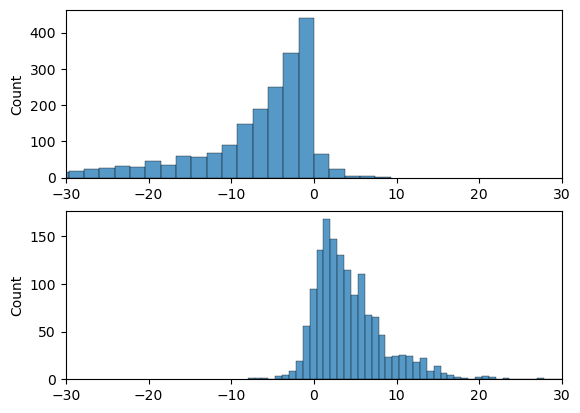

In [42]:
plot_decision(logistic_l1_cv, *Xyspam(train_df), r=(-30,30))

In [43]:
knn = make_pipeline(
    StandardScaler(), 
    KNN(n_neighbors=11)
).fit(*Xyspam(train_df))

cm_11, cr_11 = print_report(knn, *Xyspam(test_df))


Predicted    0    1
True               
0          530   34
1           56  301
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       564
           1       0.90      0.84      0.87       357

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.90       921
weighted avg       0.90      0.90      0.90       921



In [44]:
knn = make_pipeline(
    StandardScaler(), 
    KNN(n_neighbors=51)
).fit(*Xyspam(train_df))

cm_51, cr_51 = print_report(knn, *Xyspam(test_df))


Predicted    0    1
True               
0          543   21
1           77  280
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       564
           1       0.93      0.78      0.85       357

    accuracy                           0.89       921
   macro avg       0.90      0.87      0.88       921
weighted avg       0.90      0.89      0.89       921



In [45]:
lda = make_pipeline(LDA()).fit(*Xyspam(train_df))

cm_lda,cr_lda = print_report(lda, *Xyspam(test_df))

Predicted    0    1
True               
0          548   16
1           79  278
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       564
           1       0.95      0.78      0.85       357

    accuracy                           0.90       921
   macro avg       0.91      0.88      0.89       921
weighted avg       0.90      0.90      0.89       921



In [46]:
qda = make_pipeline(QDA()).fit(*Xyspam(train_df))
cm_qda,cr_qda = print_report(qda, *Xyspam(test_df))

Predicted    0    1
True               
0          397  167
1           19  338
              precision    recall  f1-score   support

           0       0.95      0.70      0.81       564
           1       0.67      0.95      0.78       357

    accuracy                           0.80       921
   macro avg       0.81      0.83      0.80       921
weighted avg       0.84      0.80      0.80       921



/home/prokaj/.config/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [47]:
gnb = GaussianNB().fit(*Xyspam(train_df))

cm_nb, cr_nb = print_report(gnb, *Xyspam(test_df))

Predicted    0    1
True               
0          416  148
1           21  336
              precision    recall  f1-score   support

           0       0.95      0.74      0.83       564
           1       0.69      0.94      0.80       357

    accuracy                           0.82       921
   macro avg       0.82      0.84      0.82       921
weighted avg       0.85      0.82      0.82       921



In [48]:
def plot_conditional(X,y,f=None):
    classes = np.unique(y)
    for c in classes:
        x = X[y==c]
        if f is not None:
            x=f(x)
        plt.hist(x,alpha=0.5,density=True, label=c)
    plt.legend()
    plt.show()

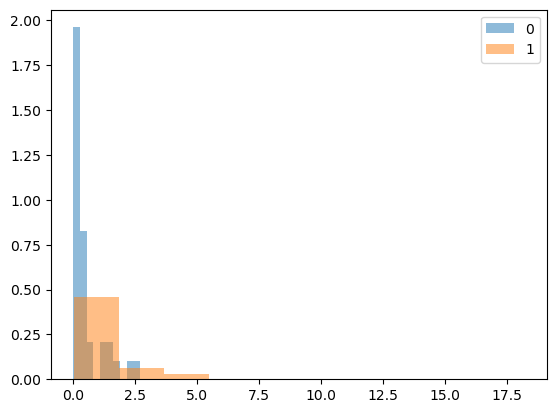

In [49]:
plot_conditional(train_df.word_freq_credit, train_df['class'], lambda x: x[x!=0])

In [50]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import _get_feature_names


def mk_fun_dict(d):
    if isinstance(d, dict):
        return d
    return {f.__name__:f for f in d if hasattr(f,'__call__')}

class AddFeatures:
    def __init__(self, 
                 fun_dict, 
                 features=None):
        self.funnames, self.funs = zip(*mk_fun_dict(fun_dict).items())
        self.features = features
    
    def get_feture_names_out(self):
        return self.feature_names_out_
    
    def fit(self, X, y=None, **kwargs):
        self.feature_names_in_ = _get_feature_names(X)
        if self.features is None:
            self.features = self.feature_names_in_
        self.feature_idx = np.nonzero(self.feature_names_in_[:,None]==self.features[None])[0]
        # np.array([self.feature_names_in_.index(f) for f in self.features])
        self.feature_names_out_ = list(self.feature_names_in_)
        for n in self.funnames:
            self.feature_names_out_.extend(f'{self.feature_names_in_[i]}_{n}' for i in self.feature_idx)
        return self
    
    def transform(self, X, **kwargs):
        X = np.asarray(X)
        X1 = X[:, self.feature_idx].reshape(X.shape[0],len(self.feature_idx))
        return np.concatenate([X]+[f(X1) for f in self.funs], axis=1)
    
    def fit_transform(self, X, y=None, **kwargs):
        return self.fit(X, y, **kwargs).transform(X,**kwargs)


In [139]:
F = AddFeatures(
    fun_dict={
        'is_zero': lambda x: 1*(x==0), 
        'log_non_zero': lambda x: np.log(np.abs(x)+1*(x==0))
    },
    features=train_df.columns[:-4]
)
F.fit_transform(*Xyspam(train_df))

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.96758403],
       [ 0.08      ,  0.17      ,  0.17      , ...,  0.        ,
        -3.77226106,  0.        ],
       [ 0.        ,  0.        ,  1.85      , ..., -0.36816932,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.76      , ..., -0.83701755,
        -0.83701755,  0.        ],
       [ 0.        ,  0.        ,  0.87      , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [137]:
# mk_fun_dict([np.log, lambda x: np.log(x)])['log'](2)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [80]:
zero_lognonzero = FunctionTransformer(lambda x: np.concatenate((x, 
                                                                1*(x==0), 
                                                                np.log(np.abs(x)+1*(x==0))), 
                                                               axis=1))

In [144]:
preprocess = make_pipeline(F, StandardScaler(with_mean=False))
preprocess.fit_transform(*Xyspam(train_df))[:10,-5::-54]

array([[ 0.        ,  2.02977408,  0.        ],
       [-2.72628091,  0.        ,  0.09515851],
       [ 0.        ,  2.02977408,  0.        ],
       [ 0.        ,  2.02977408,  0.        ],
       [-2.67034163,  0.        ,  0.        ],
       [-2.19310826,  0.        ,  0.34753543],
       [ 0.        ,  2.02977408,  0.        ],
       [-1.01720739,  0.        ,  0.        ],
       [-1.56371681,  0.        ,  0.05378524],
       [-1.72825847,  0.        ,  0.92676113]])

In [145]:
logistic_fe_l1_cv = make_pipeline(preprocess, 
                               LogisticRegressionCV(Cs=[0.1, 0.5, 1, 2.5, 5], # #[0.1,1,5,10,50,100], 
                                                    penalty='l1', 
                                                    cv=cv, 
                                                    solver = 'liblinear',
                                                    refit=True)).fit(*Xyspam(train_df)) #spam['frame']))



In [146]:
l1_fe_best_C=logistic_fe_l1_cv[1].C_
print(l1_fe_best_C)

[0.5]


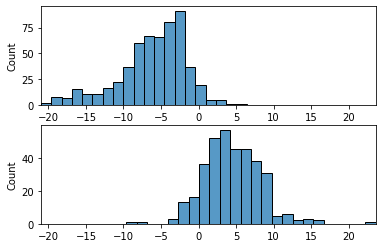

In [147]:
plot_decision(logistic_fe_l1_cv, *Xyspam(test_df), r=(-30,30))

In [148]:
log_fe_l1_cv = logistic_fe_l1_cv[1]
print('number of zero coefficients')
nonzero_coef= pd.DataFrame((log_fe_l1_cv.coefs_paths_['1']==0).sum(axis=-1), 
                            columns=log_fe_l1_cv.Cs)
nonzero_coef.index.name = 'Fold index'
nonzero_coef.columns.name = 'C'
print(nonzero_coef.to_string(line_width=80))

coef_zero = np.where(log_fe_l1_cv.coef_[0]==0)[0]
print('number of zero coefficients of the refitted model with the best C: ', len(coef_zero))

number of zero coefficients
C           0.1  0.5  1.0  2.5  5.0
Fold index                         
0            91   53   37   30   14
1            92   54   37   21   18
2            89   62   42   31   23
3            94   57   30   26   16
4            93   61   42   20   18
number of zero coefficients of the refitted model with the best C:  52


In [155]:
np.array(F.feature_names_out_)[coef_zero]

array(['word_freq_3d', 'word_freq_over', 'word_freq_receive',
       'word_freq_addresses', 'word_freq_your', 'word_freq_font',
       'word_freq_hpl', 'word_freq_lab', 'word_freq_labs',
       'word_freq_telnet', 'word_freq_857', 'word_freq_415',
       'word_freq_technology', 'word_freq_1999', 'word_freq_cs',
       'capital_run_length_average', 'word_freq_will_is_zero',
       'word_freq_you_is_zero', 'word_freq_telnet_is_zero',
       'word_freq_data_is_zero', 'word_freq_415_is_zero',
       'word_freq_parts_is_zero', 'word_freq_pm_is_zero',
       'word_freq_direct_is_zero', 'word_freq_table_is_zero',
       'char_freq_%5B_is_zero', 'word_freq_make_log_non_zero',
       'word_freq_address_log_non_zero', 'word_freq_remove_log_non_zero',
       'word_freq_order_log_non_zero', 'word_freq_mail_log_non_zero',
       'word_freq_receive_log_non_zero', 'word_freq_will_log_non_zero',
       'word_freq_people_log_non_zero',
       'word_freq_addresses_log_non_zero',
       'word_freq_busine

In [149]:
print_report(logistic_fe_l1_cv,*Xyspam(test_df))
None

Predicted    0    1
True               
0          540   24
1           34  323
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       564
           1       0.93      0.90      0.92       357

    accuracy                           0.94       921
   macro avg       0.94      0.93      0.93       921
weighted avg       0.94      0.94      0.94       921



In [153]:
print(cm_l1)

Predicted    0    1
True               
0          542   22
1           39  318


In [159]:
logistic_fe_l2_cv = make_pipeline(preprocess, 
                                  LogisticRegressionCV(Cs=[0.01,0.1, 0.25, 0.5,0.75, 1, 2.5, 5], # #[0.1,1,5,10,50,100], 
                                                    penalty='l2', 
                                                    cv=cv, 
                                                    solver = 'liblinear',
                                                    refit=True)).fit(*Xyspam(train_df)) #spam['frame']))



In [160]:
l2_fe_best_C=logistic_fe_l2_cv[1].C_
print(l2_fe_best_C)

[0.5]


In [161]:
print_report(logistic_fe_l2_cv,*Xyspam(test_df))
None

Predicted    0    1
True               
0          538   26
1           34  323
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       564
           1       0.93      0.90      0.92       357

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



In [166]:
logistic_fe_elastic_cv = make_pipeline(preprocess, 
                                  LogisticRegressionCV(Cs=[0.01,0.1, 0.25, 0.5,0.75, 1, 2.5, 5], # #[0.1,1,5,10,50,100], 
                                                    penalty='elasticnet', 
                                                    cv=cv, 
                                                    solver = 'saga',
                                                    l1_ratios=[0.25,0.5,0.75],
                                                    max_iter=5000,
                                                    refit=True)).fit(*Xyspam(train_df)) #spam['frame']))


In [165]:
print_report(logistic_fe_elastic_cv,*Xyspam(test_df))
None

Predicted    0    1
True               
0          537   27
1           33  324
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       564
           1       0.92      0.91      0.92       357

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921

